<a href="https://colab.research.google.com/github/mindang/pytorch-master/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!는 한줄씩 실행되도록 !가 없으면 오류 발생
!pip3 install torch
!pip3 install torchvision

In [38]:
import torch
from torchvision import models
import numpy as np

In [70]:
dir(models)[:5]

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights']

In [19]:
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
resnet

In [21]:
#이미지 전처리 파이프라인
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485,0.456,0.406],
        std = [0.229,0.224,0.225])
])

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from PIL import Image
image = Image.open("/content/drive/MyDrive/pytorch-master/airplane_ex1.jpg")

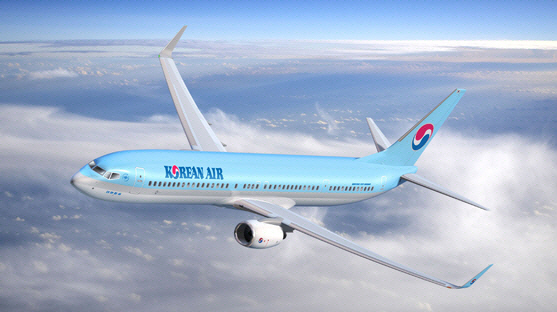

In [37]:
image

In [39]:
np.array(image).shape

(312, 557, 3)

In [41]:
image_t = preprocess(image)
image_t.shape

torch.Size([3, 224, 224])

In [46]:
batch_t = torch.unsqueeze(image_t,0)

In [48]:
resnet.eval()
out = resnet(batch_t)

In [50]:
out.shape

torch.Size([1, 1000])

In [52]:
with open("/content/drive/MyDrive/pytorch-master/imagenet_classes.txt") as f:
  labels = [line.strip() for line in f.readlines()]

In [55]:
_ , index = torch.max(out,1)

In [63]:
#[0]은 텐서가 1 , 1000 형태이므로 사용
percentage = torch.nn.functional.softmax(out,dim=1)[0] * 100
labels[index[0]],percentage[index[0]].item()

('airliner', 88.70442199707031)

In [67]:
#_부분에는 수치가 들어감 , indices부분에는 인덱스
_,indices = torch.sort(out,descending=True)
[(labels[idx] , percentage[idx].item()) for idx in indices[0][:5]]

[('airliner', 88.70442199707031),
 ('wing', 11.209521293640137),
 ('warplane, military plane', 0.039530713111162186),
 ('space shuttle', 0.03447531908750534),
 ('trimaran', 0.003328214632347226)]